In [3]:
import numpy as np

In [4]:
x = var("x")

In [5]:
pts = [[-0.2,1.7722],
       [0.0,1.5708],
       [0.2,1.3694],
       [0.4,1.1593],
       [0.6,0.9273]]

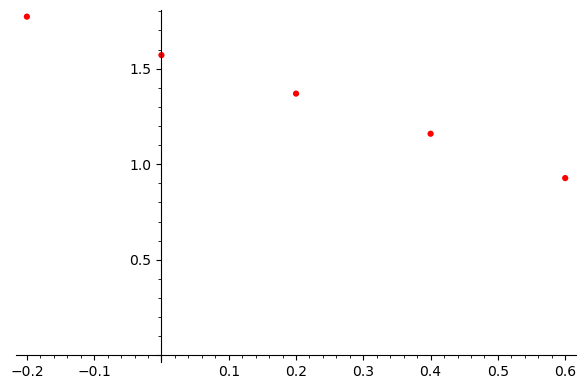

In [6]:
plt = point(pts[0],color = "red",size = 20)
for i in range(1, len(pts)):
    plt += point(pts[i],color = "red",size = 20) 
show(plt,ymin = 0)

In [2]:
def s_numeric_derivative(pts,i):
    
    ptsA = np.array(pts)
    X = ptsA[:,0]
    Y = ptsA[:,1]
    
    
    res = (Y[i+1] - Y[i])/(X[i+1] - X[i]) 
    
    return res

def numeric_derivative(pts,i):
    
    ptsA = np.array(pts)
    X = ptsA[:,0]
    Y = ptsA[:,1]
    
    
    res = (Y[i+1] - Y[i])/(X[i+1] - X[i]) 
    rf = (((Y[i+2] - Y[i+1])/(X[i+2] - X[i+1])) - res) / (X[i+2] - X[i])
                                        
    rf*=(2*x - X[i] - X[i + 1])
    
    return res + rf
    
def numeric_derivative_2(pts,i):
    
    ptsA = np.array(pts)
    X = ptsA[:,0]
    Y = ptsA[:,1]
    
    
    res = ((Y[i+2] - Y[i+1])/(X[i+2] - X[i+1]) - (Y[i+1] - Y[i])/(X[i+1] - X[i])) / (X[i+2] - X[i])
    
    return 2*res

In [42]:
numeric_derivative_2(pts,1)

-0.21749999999999825

In [1]:
def formt_for_show(pts):
    res = []
    for a in pts:
        res.append((a[0].n(digits = 2),a[1].n(digits = 2)))
    return res 

def points_to_plot(pts):
    pl = point(pts[0],color = "red",size = 20)
    for i in range(1,len(pts)):
        pl += point(pts[i],color = "red",size = 20)
    return pl

##можно использовать функции для сплайна, потому что что то, что то – набор функций по промежуткам 
def spline_to_plot(splfnc,pts,color): #собирает из системы функций сплайна готовый график
    pltf = plot(func[0],xmin = pts[0][0],xmax = pts[1][0],color = color)
    for i in range(1,len(pts) -1):
        pltf += plot(splfnc[i],xmin = pts[i][0],xmax = pts[i+1][0],color = color)
    return pltf

def val_of_spline(funcsys,pts,pt): #вычисление значения сплайна от точки
    for i in range(len(pts) - 1):
        if(pts[i][0] < pt and pts[i + 1][0] >= pt):
            return funcsys[i](x = pt)
    else:
        return false

In [51]:
func = []
for i in range(0, len(pts) - 2):
    func.append(numeric_derivative(pts,i))
    
func2 = []
for i in range(0, len(pts) - 2):
    func2.append(numeric_derivative_2(pts,i))

In [46]:
len(pts)

5

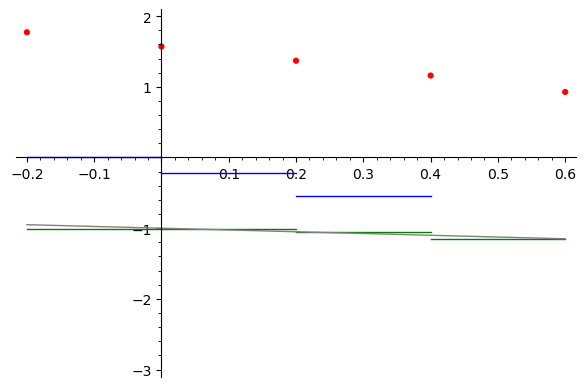

In [80]:
plt = point(pts[0],color = "red",size = 20)
for i in range(1, len(pts)):
    plt += point(pts[i],color = "red",size = 20) 
show(plt + 
     plot(s_numeric_derivative(pts,0),xmin = pts[0][0],xmax = pts[1][0],color = "green") +
     plot(s_numeric_derivative(pts,1),xmin = pts[1][0],xmax = pts[2][0],color = "green") +
     plot(s_numeric_derivative(pts,2),xmin = pts[2][0],xmax = pts[3][0],color = "green") +
     plot(s_numeric_derivative(pts,3),xmin = pts[3][0],xmax = pts[4][0],color = "green") +
     plot(drf,xmin = -0.2,xmax = 0.6,color = "grey") + 
     plot(numeric_derivative_2(pts,0),xmin = pts[0][0],xmax = pts[1][0]) +
     plot(numeric_derivative_2(pts,1),xmin = pts[1][0],xmax = pts[2][0]) +
     plot(numeric_derivative_2(pts,2),xmin = pts[2][0],xmax = pts[3][0])
     ,ymin = -3,ymax = 2)

In [81]:
show("Первая производная в точке 0.2")
show(val_of_spline(func,np.array(pts)[0:4],0.2))

'Производная в точке 0.2'

-1.02875

In [87]:
show("Вторая производная в точке 0.2")
show(func2[1])

'Вторая производная в точке 0.2'

-0.21749999999999825

In [27]:
f = Least_squares(pts,2)

In [28]:
drf = f.derivative()

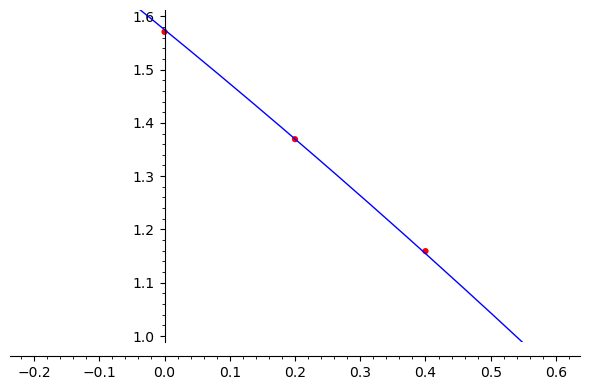

In [29]:
plt = point(pts[0],color = "red",size = 20)
for i in range(1, len(pts)):
    plt += point(pts[i],color = "red",size = 20) 
show(plt + plot(f),ymin = 1,ymax = 1.6,xmin = -0.22,xmax = 0.62)

In [30]:
def Least_squares(pts,n): #порядок приближаемой функции    
    
    N = len(pts) #число точек

    ptsA = np.array(pts)
    X = ptsA[:,0]
    Y = ptsA[:,1]
    n+=1

    names = "" #инициализация переменных
    for i in range (n):
        names += "a" + (str(i)) + " "
    a = var(names)
    
    eqsys = [] #построение системы

    for k in range (n):
        eqls = 0
        eqrs = 0
        for i in range(n):
            eqa = 0
            for j in range(N):
                eqa += X[j]**(i+k)

            #eqls *= eqa

            eqls += a[i]*eqa

        for j in range(N):
            eqrs += Y[j]*(X[j]**k)

        eqsys.append(eqls == eqrs)
        
    sols = solve(eqsys,a) #решение системы
    
    func = 0
    for i in range(len(sols[0])):
        func += sols[0][i].rhs()*x**i
        
    return func